In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_train_full.shape

(60000, 28, 28)

In [4]:
X_valid, X_train = X_train_full[:5000] /255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [5]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [6]:
class_names[y_train[0]]

'Coat'

In [7]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.layers

In [10]:
model.layers[2].name

'dense_1'

In [11]:
model.get_layer('dense_1').name

'dense_1'

In [12]:
weights, biases = model.layers[1].get_weights()

In [13]:
weights.shape

(784, 300)

In [14]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [15]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer='sgd',
              metrics=["accuracy"])

In [16]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 2ms/step - loss: 0.6955 - accuracy: 0.7729 - val_loss: 0.5020 - val_accuracy: 0.8364
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4868 - accuracy: 0.8309 - val_loss: 0.4482 - val_accuracy: 0.8510
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4450 - accuracy: 0.8444 - val_loss: 0.4352 - val_accuracy: 0.8534
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4201 - accuracy: 0.8513 - val_loss: 0.4285 - val_accuracy: 0.8542
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3982 - accuracy: 0.8609 - val_loss: 0.3942 - val_accuracy: 0.8618
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3831 - accuracy: 0.8645 - val_loss: 0.3882 - val_accuracy: 0.8632
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3690 - accuracy: 0.8699 - val_loss: 0.3715 - val_accuracy:

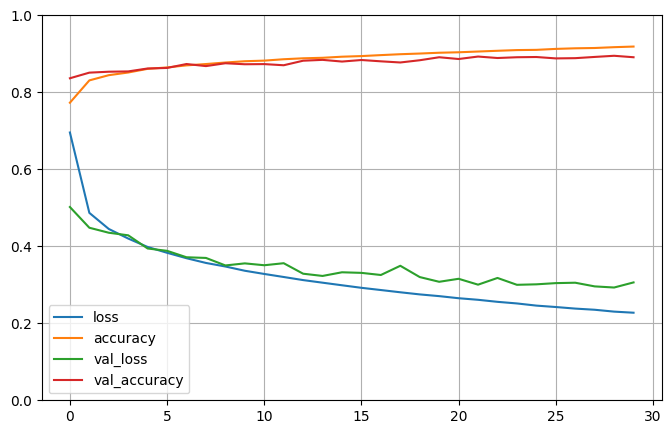

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [18]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 57.4410 - accuracy: 0.8550


[57.441043853759766, 0.8550000190734863]

In [37]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 60ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [64]:
y_pred = model.predict(X_new)
y_pred

1/1 [==============================] - 0s 25ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [95]:
y_pred_index = [0 for i in range(3)] 
for i, row in enumerate(y_pred):
    # y_pred_index.append(list(row).index(max(row)))
    y_pred_index[i] = list(row).index(max(row))
    

In [96]:
y_pred_index

[9, 2, 1]

In [97]:
import numpy as np
np.array(class_names)[y_pred_index]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [99]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)